In [744]:
import scanpy as sc
import pandas as pd
import os

In [745]:
print(os.chdir("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v2\\data"))

None


In [746]:
print(os.getcwd())

C:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\Ovary_v2\data


In [747]:
MATRIX = f"{os.getcwd()}\\GEO12\\raw_feature_bc_matrix\\\matrix.mtx.gz"
FEATURES = f"{os.getcwd()}\\GEO12\\raw_feature_bc_matrix\\features.tsv.gz"
BARCODES = f"{os.getcwd()}\\GEO12\\raw_feature_bc_matrix\\barcodes.tsv.gz"
POS = f"{os.getcwd()}\\GEO12\\spatial\\tissue_positions_list.csv"

In [748]:
modelo = sc.read_visium("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\10x2")
adata = sc.read(MATRIX, delimiter='\t')

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [749]:
genes = pd.read_csv(FEATURES, delimiter="\t", header=None, index_col=0)
genes.index.name = None

In [750]:
genes = genes.rename(columns={1:'gene_ids', 2:'feature_types'})

In [751]:
barcodes = pd.read_csv(BARCODES, header=None, delimiter="\t")

In [752]:
barcodes.size

176

In [753]:
genes.head(5)

,gene_ids,feature_types
ENSG00000243485,MIR1302-2HG,Gene Expression
ENSG00000237613,FAM138A,Gene Expression
ENSG00000186092,OR4F5,Gene Expression
ENSG00000238009,AL627309.1,Gene Expression
ENSG00000239945,AL627309.3,Gene Expression


In [754]:
genes.size

73202

In [755]:
modelo.var.head(5)

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38


In [756]:
adata.var.head(5)

""
0
1
2
3
4


In [757]:
pos_info = pd.read_csv("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v2\\data\\GEO2\\spatial\\tissue_positions_list.csv", header=None)

In [758]:
pos_info.head()

,0,1,2,3,4,5
0,ACGCCTGACACGCGCT-1,0,0,0,1013,1407
1,TACCGATCCAACACTT-1,0,1,1,1111,1456
2,ATTAAAGCGGACGAGC-1,0,0,2,1019,1516
3,GATAAGGGACGATTAG-1,0,1,3,1117,1566
4,GTGCAAATCACCAATA-1,0,0,4,1025,1626


In [759]:
modelo

AnnData object with n_obs × n_vars = 3493 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [760]:
modelo.obsm["spatial"]

array([[ 6010, 13695],
       [17401, 15830],
       [18221, 12964],
       ...,
       [14245, 15595],
       [15892, 16071],
       [16299, 12489]], dtype=int64)

In [761]:
modelo.X

<3493x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 12249535 stored elements in Compressed Sparse Row format>

In [762]:
a = "gene_ids", "feature_types"

In [763]:
modelo.var.head(5)

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38


In [764]:
modelo.obs.head(5)

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGGGTCTATATT-1,1,47,13
AAACATTTCCCGGATT-1,1,61,97
AAACCCGAACGAAATC-1,1,45,115


In [765]:
adata

AnnData object with n_obs × n_vars = 36601 × 176

In [766]:
adata = adata.T

In [767]:
adata.var = genes

In [768]:
adata.obs.head(5)

""
0
1
2
3
4


In [769]:
barcodes.index.name = None

In [770]:
barcodes.head(5)

,0
0,AAACTGCTGGCTCCAA-1
1,AAATACCTATAAGCAT-1
2,AAATCGTGTACCACAA-1
3,AATGACGTAGGATGTC-1
4,AATTGAACGCTCTGGT-1


In [771]:
pos = pd.merge(pos_info, barcodes, how='inner', on=[0])

In [772]:
pos = pos[[0,4,5]]

In [773]:
pos.index = pos[0]
del pos[0]

In [774]:
pos = pos.rename(columns={4:"array_row", 5:"array_col"})

In [775]:
pos.index.name = None

In [776]:
pos.head(5)

,array_row,array_col
GCATAGAGCACTCAGG-1,4716,4459
GCAGATTAGGGATATC-1,4722,4568
CAATTTCGTATAAGGG-1,4727,4678
CCAGCCTGGACCAATA-1,4733,4788
CACTCAAGAGCTATGG-1,4901,4339


In [777]:
adata

AnnData object with n_obs × n_vars = 176 × 36601
    var: 'gene_ids', 'feature_types'

In [778]:
adata.obs = pos

In [779]:
adata.obs

,array_row,array_col
GCATAGAGCACTCAGG-1,4716,4459
GCAGATTAGGGATATC-1,4722,4568
CAATTTCGTATAAGGG-1,4727,4678
CCAGCCTGGACCAATA-1,4733,4788
CACTCAAGAGCTATGG-1,4901,4339
...,...,...
CTGCACAACTACATAT-1,6006,5326
TCGCACCAGGAGGCAG-1,6018,5546
ACAAATCGCACCGAAT-1,6023,5655
TTGAACGACGTGCTGA-1,6995,5935


In [780]:
adata.obs.head(5)

,array_row,array_col
GCATAGAGCACTCAGG-1,4716,4459
GCAGATTAGGGATATC-1,4722,4568
CAATTTCGTATAAGGG-1,4727,4678
CCAGCCTGGACCAATA-1,4733,4788
CACTCAAGAGCTATGG-1,4901,4339


In [781]:
adata.var.head(5)

,gene_ids,feature_types
ENSG00000243485,MIR1302-2HG,Gene Expression
ENSG00000237613,FAM138A,Gene Expression
ENSG00000186092,OR4F5,Gene Expression
ENSG00000238009,AL627309.1,Gene Expression
ENSG00000239945,AL627309.3,Gene Expression


In [782]:
modelo

AnnData object with n_obs × n_vars = 3493 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [783]:
print(adata.X.size, modelo.X.size)

325672 12249535


In [784]:
from anndata import AnnData

In [785]:
coordinates = pos.values

In [786]:
adata.obsm["spatial"] = coordinates

In [787]:
modelo.uns

OrderedDict([('spatial',
              {'Parent_Visium_Human_OvarianCancer': {'images': {'hires': array([[[0.        , 0.        , 0.        ],
                         [0.        , 0.        , 0.        ],
                         [0.        , 0.        , 0.        ],
                         ...,
                         [0.01568628, 0.01568628, 0.01960784],
                         [0.01568628, 0.01568628, 0.01960784],
                         [0.01568628, 0.01568628, 0.01960784]],
                 
                        [[0.01568628, 0.00784314, 0.01568628],
                         [0.01568628, 0.00784314, 0.01568628],
                         [0.01568628, 0.00784314, 0.01568628],
                         ...,
                         [0.01568628, 0.01568628, 0.01960784],
                         [0.01568628, 0.01568628, 0.02352941],
                         [0.01568628, 0.01568628, 0.01960784]],
                 
                        [[0.01568628, 0.00784314, 0.01568628],
  

In [788]:
uns = pd.DataFrame(modelo.uns)

In [789]:
adata

AnnData object with n_obs × n_vars = 176 × 36601
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types'
    obsm: 'spatial'

In [790]:
from PIL import Image
import numpy as np

In [791]:
hirer = "C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\GEO1\\spatial\\II21472_tissue_hires_image.png"
lower = "C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\Ovary_v2\\data\\GEO2\\spatial\\II21473_tissue_lowres_image.png"

imh = Image.open(hirer)
iml = Image.open(lower)

image_hirer = np.array(imh)
image_lower = np.array(iml)

In [792]:
modelo_uns = {
    'spatial': {
        'library_id': {
            'images': {
                'hires': image_hirer,  # Substitua pelo seu array de imagens hires
                'lowres': image_lower  # Substitua pelo seu array de imagens lowres
            },
            'scalefactors': {
                "spot_diameter_fullres": 71.43368262329287,
                "tissue_hires_scalef": 0.20631318,
                "fiducial_diameter_fullres": 115.37384801011467,
                "tissue_lowres_scalef": 0.061893955
            },
            'metadata': {
                'chemistry_description': "Spatial 3' v1",
                'software_version': 'spaceranger-1.2.0'
            }
        }
    }
}


In [793]:
adata.uns = modelo_uns

In [794]:
adata

AnnData object with n_obs × n_vars = 176 × 36601
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types'
    uns: 'spatial'
    obsm: 'spatial'

In [795]:
sc.read("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\Resultados\\GEO_files\\PP_GEO12.h5ad")

AnnData object with n_obs × n_vars = 131 × 4483
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [799]:
# 9 , 21480
# 102 , 23420
# 26 , 24006
# 43 , 22974
# 18 , 20691
# 13 , 21323
# 121 , 27880
##### 24 , 34000
#6 ,  
# 288 , 
#36
# 45
print(176       - 131      )
barcodes_cortados = sum([9, 102, 26, 43, 18, 13, 121, 24, 6,288, 36, 45])
genes_cortados = sum([21480, 23420])
barcodes_cortados
dado_tenx = 93

45


In [800]:
barcodes_cortados + dado_tenx

824

In [ ]:
adata.uns

{'spatial': {'library_id': {'images': {'hires': array([[[  2,   2,   2, 255],
            [ 61,  61,  61, 255],
            [ 86,  86,  87, 255],
            ...,
            [174, 172, 174, 255],
            [164, 162, 165, 255],
            [ 37,  36,  37, 255]],
    
           [[  6,   6,   6, 255],
            [163, 163, 164, 255],
            [230, 228, 231, 255],
            ...,
            [231, 229, 232, 255],
            [218, 217, 219, 255],
            [ 49,  49,  49, 255]],
    
           [[  6,   6,   6, 255],
            [164, 163, 164, 255],
            [231, 230, 232, 255],
            ...,
            [230, 230, 232, 255],
            [218, 217, 219, 255],
            [ 49,  49,  49, 255]],
    
           ...,
    
           [[134, 133, 134, 255],
            [230, 230, 231, 255],
            [230, 230, 231, 255],
            ...,
            [231, 230, 231, 255],
            [231, 230, 231, 255],
            [173, 172, 174, 255]],
    
           [[134, 133, 133,

In [ ]:
new_adata = "C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\my_adata\\new_adata"
adata.write_h5ad(new_adata)

In [ ]:
adata = sc.read_h5ad(new_adata)

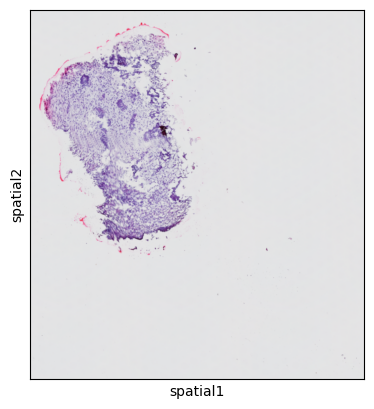

In [52]:
sc.pl.spatial(adata)

In [53]:
adata

AnnData object with n_obs × n_vars = 176 × 36601
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
######stop######

In [ ]:
DESLIGA O MONITOR QUE GASTA ENERGIA SEUS BUNDA MOLE

In [60]:
adata.uns["spatial"] = {"library_id": {}}

In [61]:
adata.uns["spatial"]["library_id"]["images"] = {}

In [62]:
adata.uns['spatial']["library_id"]['images']['hires'] = image.astype(np.float32)

In [68]:
adata.uns

OrderedDict([('spatial',
              {'library_id': {'images': {'hires': array([[[ 41.,  39.,  39.],
                         [ 41.,  39.,  39.],
                         [ 41.,  39.,  39.],
                         ...,
                         [198., 193., 186.],
                         [192., 186., 179.],
                         [ 53.,  51.,  49.]],
                 
                        [[189., 178., 179.],
                         [189., 179., 177.],
                         [189., 180., 177.],
                         ...,
                         [198., 193., 186.],
                         [192., 186., 180.],
                         [ 52.,  50.,  49.]],
                 
                        [[201., 189., 189.],
                         [201., 191., 188.],
                         [201., 192., 188.],
                         ...,
                         [198., 193., 185.],
                         [192., 186., 180.],
                         [ 52.,  50.,  49.]],
   

In [64]:
adata.write("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\my_adata\\GEO.h5ad")

In [65]:
adata.write("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\my_adata\\GEO.hdf5")

In [67]:
sc.read_h5ad("C:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\Ovary_v4\data\my_adata\GEO.h5ad")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (485288276.py, line 1)

In [ ]:
#pip freeze > requirements.txt
